# Homework 02

### Ana Belen Barcenas J.

**1**. (25 points)

Generate the DataFrame `df` using `pendulum`, `itertools` and `pandas`. Note that th locales used are English, French and Russian.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('schedule.csv')
df

,Day,Homework due,Subject
0,"24 (Sa) August, 2019 12:08:00 PM",1 week before,BIOS 823
1,"25 (Su) August, 2019 12:08:00 PM",6 jours avant,BIOS 824
2,"26 (Mo) August, 2019 12:08:00 PM",5 дней до,BIOS 823
3,"27 (Tu) August, 2019 12:08:00 PM",4 days before,BIOS 824
4,"28 (We) August, 2019 12:08:00 PM",3 jours avant,BIOS 823
5,"29 (Th) August, 2019 12:08:00 PM",2 дня до,BIOS 824
6,"30 (Fr) August, 2019 12:08:00 PM",1 day before,BIOS 823
7,"31 (Sa) August, 2019 12:08:00 PM",12 heures avant,BIOS 824


In [11]:
## Define start and stop of the dates we want to print ###


import pendulum
import itertools as it

start = pendulum.datetime(2019, 8, 24, 12, 8, 0)
stop = start.add(days=7)
period = stop - start

print(period)

<Period [2019-08-24T12:08:00+00:00 -> 2019-08-31T12:08:00+00:00]>


In [10]:
pendulum.datetime?

In [12]:
## Now, let's create a list for the days and another list for due dates

fmt='DD (dd) MMMM, YYYY hh:mm:ss A'
day = []
homework_due = []

for d in period.range('days'):
    day.append(d.format(fmt))
    for i in range(len(day)):
        homework_due_ = start.add(days=-7.5+i)
        homework_due_.format(fmt)
        
        it_locale = list(it.islice(it.cycle([(homework_due_.diff_for_humans(start,locale='en')),
                                             (homework_due_.diff_for_humans(start,locale='fr')),
                                             (homework_due_.diff_for_humans(start,locale='RU'))]), 8))

    homework_due.append(it_locale[i])
        
print(homework_due)
print(day)

['1 week before', '6 jours avant', '5 дней до', '4 days before', '3 jours avant', '2 дня до', '1 day before', '12 heures avant']
['24 (Sa) August, 2019 12:08:00 PM', '25 (Su) August, 2019 12:08:00 PM', '26 (Mo) August, 2019 12:08:00 PM', '27 (Tu) August, 2019 12:08:00 PM', '28 (We) August, 2019 12:08:00 PM', '29 (Th) August, 2019 12:08:00 PM', '30 (Fr) August, 2019 12:08:00 PM', '31 (Sa) August, 2019 12:08:00 PM']


In [19]:
day

['24 (Sa) August, 2019 12:08:00 PM',
 '25 (Su) August, 2019 12:08:00 PM',
 '26 (Mo) August, 2019 12:08:00 PM',
 '27 (Tu) August, 2019 12:08:00 PM',
 '28 (We) August, 2019 12:08:00 PM',
 '29 (Th) August, 2019 12:08:00 PM',
 '30 (Fr) August, 2019 12:08:00 PM',
 '31 (Sa) August, 2019 12:08:00 PM']

In [20]:
## Lastly, let's create a list of the subjects (two different)

subject = list(it.islice(it.cycle(['BIOS 823', 'BIOS 824']), 8))
subject

['BIOS 823',
 'BIOS 824',
 'BIOS 823',
 'BIOS 824',
 'BIOS 823',
 'BIOS 824',
 'BIOS 823',
 'BIOS 824']

In [23]:
type(subject)

list

In [24]:
## Create a list of tuples with the 3 elements of the dataframe

elements = list(zip(day, homework_due, subject))

In [25]:
elements

[('24 (Sa) August, 2019 12:08:00 PM', '1 week before', 'BIOS 823'),
 ('25 (Su) August, 2019 12:08:00 PM', '6 jours avant', 'BIOS 824'),
 ('26 (Mo) August, 2019 12:08:00 PM', '5 дней до', 'BIOS 823'),
 ('27 (Tu) August, 2019 12:08:00 PM', '4 days before', 'BIOS 824'),
 ('28 (We) August, 2019 12:08:00 PM', '3 jours avant', 'BIOS 823'),
 ('29 (Th) August, 2019 12:08:00 PM', '2 дня до', 'BIOS 824'),
 ('30 (Fr) August, 2019 12:08:00 PM', '1 day before', 'BIOS 823'),
 ('31 (Sa) August, 2019 12:08:00 PM', '12 heures avant', 'BIOS 824')]

In [7]:
## Bring all the elements together in a dataframe called df_

columns = ['Day', 'Homework due', 'Subject']

df_ = pd.DataFrame(elements, columns = columns)
df_

,Day,Homework due,Subject
0,"24 (Sa) August, 2019 12:08:00 PM",1 week before,BIOS 823
1,"25 (Su) August, 2019 12:08:00 PM",6 jours avant,BIOS 824
2,"26 (Mo) August, 2019 12:08:00 PM",5 дней до,BIOS 823
3,"27 (Tu) August, 2019 12:08:00 PM",4 days before,BIOS 824
4,"28 (We) August, 2019 12:08:00 PM",3 jours avant,BIOS 823
5,"29 (Th) August, 2019 12:08:00 PM",2 дня до,BIOS 824
6,"30 (Fr) August, 2019 12:08:00 PM",1 day before,BIOS 823
7,"31 (Sa) August, 2019 12:08:00 PM",12 heures avant,BIOS 824


**2**. (25 points)

Given the DataFrame `df`, recreate the correlation plot shown using `seaborn`. Note the color mapping is `viridis`.

In [26]:
import numpy as np
import string

In [27]:
np.random.seed(123)
nrows = 10
ncols = 10
k = 6
xs = np.random.normal(0, 1, (nrows, ncols))
names = [''.join(np.random.choice(list(string.ascii_lowercase), k)) for i in range(10)]
df = pd.DataFrame(xs, columns=names)
df

,bdryox,fbsfcs,onzdso,wxjrdl,ylkdnx,zzoddo,vwqyxx,eefqyj,cfbfjp,ckedqd
0,-1.085631,0.997345,0.282978,-1.506295,-0.578600,1.651437,-2.426679,-0.428913,1.265936,-0.866740
1,-0.678886,-0.094709,1.491390,-0.638902,-0.443982,-0.434351,2.205930,2.186786,1.004054,0.386186
2,0.737369,1.490732,-0.935834,1.175829,-1.253881,-0.637752,0.907105,-1.428681,-0.140069,-0.861755
3,-0.255619,-2.798589,-1.771533,-0.699877,0.927462,-0.173636,0.002846,0.688223,-0.879536,0.283627
4,-0.805367,-1.727669,-0.390900,0.573806,0.338589,-0.011830,2.392365,0.412912,0.978736,2.238143
5,-1.294085,-1.038788,1.743712,-0.798063,0.029683,1.069316,0.890706,1.754886,1.495644,1.069393
6,-0.772709,0.794863,0.314272,-1.326265,1.417299,0.807237,0.045490,-0.233092,-1.198301,0.199524
7,0.468439,-0.831155,1.162204,-1.097203,-2.123100,1.039727,-0.403366,-0.126030,-0.837517,-1.605963
8,1.255237,-0.688869,1.660952,0.807308,-0.314758,-1.085902,-0.732462,-1.212523,2.087113,0.164441
9,1.150206,-1.267352,0.181035,1.177862,-0.335011,1.031114,-1.084568,-1.363472,0.379401,-0.379176


In [10]:
#from IPython.display import Image
#Image('corrplot.png')

<function matplotlib.pyplot.show>

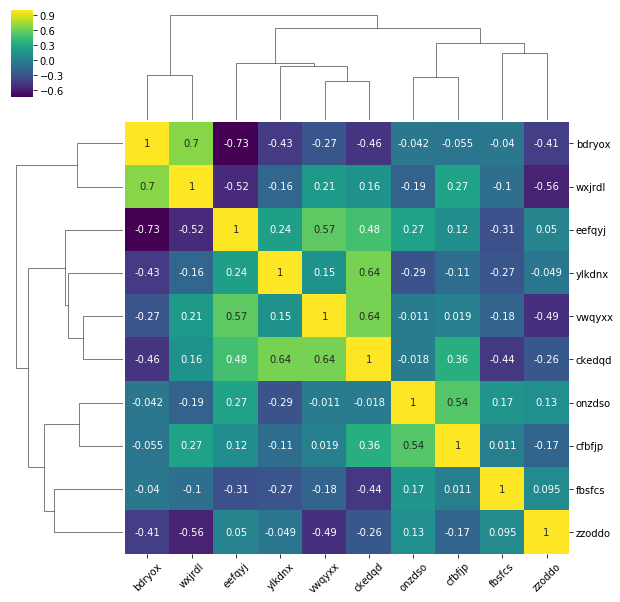

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


g = sns.clustermap(df.corr(), cmap='viridis', annot=True)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=45)

plt.show

**3**. (50 points)

We will use the REST API at `https://swapi.co/api` to find out more information about the people with IDs 1,2 and 3.
    
- Use the `requests` library to get information about these 3 people in JSON format
- Store the information in a pandas data frame
- Add two columns `bmi` and `obese` 
    - `bmi` is mass in kg/(height in meters)^2
    - `obese` is true if `bmi` > 30 and false otherwise
- Convert the data frame to a "tidy" data frame by ensuring there is only one value in each cell
- Replace URLs in each cell in the `homeworld`, `films`, `species`, `vehicles` and `starships` columns with the `title` (for the films column) or the `name` (for every other column) which you can find by a REST lookup at `https://swapi.co/api`
- Minimize the number of REST requests made either by caching results or ensuring only unique lookups

The final data frame should look like the one below.

In [29]:
import requests
from pandas.io.json import json_normalize

df = pd.DataFrame()
for i in (1,2,3):
    link = 'https://swapi.co/api/people/' + str(i) + '/'
    r = requests.get(link)
    r.status_code
    r.headers['content-type']
    r.encoding
    r.text
    
    r_ = [r.json()]
    result = pd.DataFrame.from_dict(r_, orient='columns')
    df = df.append(result, ignore_index = True)
        
df

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.co/api/planets/1/,"[https://swapi.co/api/films/2/, https://swapi....",[https://swapi.co/api/species/1/],"[https://swapi.co/api/vehicles/14/, https://sw...","[https://swapi.co/api/starships/12/, https://s...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.co/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.co/api/planets/1/,"[https://swapi.co/api/films/2/, https://swapi....",[https://swapi.co/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.co/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.co/api/planets/8/,"[https://swapi.co/api/films/2/, https://swapi....",[https://swapi.co/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.co/api/people/3/


In [30]:
df_ = df.explode("films").explode("species").explode("vehicles").explode("starships")
df_.shape

(10569417, 16)

In [87]:
df_.drop_duplicates(inplace=True)
df_.shape

(33, 16)

In [88]:
df_['mass'] = df_['mass'].astype(int)
df_['height'] = df_['height'].astype(int)

In [89]:
df_['bmi'] = df_.apply(lambda row: (row.mass/100)*100 / (row.height/100)**2, axis = 1)
df_['obese'] = df_.bmi.apply(lambda row: True if row>30 else False)
df_.head(3)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url,bmi,obese
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.co/api/planets/1/,https://swapi.co/api/films/2/,https://swapi.co/api/species/1/,https://swapi.co/api/vehicles/14/,https://swapi.co/api/starships/12/,2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.co/api/people/1/,26.027582,False
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.co/api/planets/1/,https://swapi.co/api/films/2/,https://swapi.co/api/species/1/,https://swapi.co/api/vehicles/14/,https://swapi.co/api/starships/22/,2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.co/api/people/1/,26.027582,False
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.co/api/planets/1/,https://swapi.co/api/films/2/,https://swapi.co/api/species/1/,https://swapi.co/api/vehicles/30/,https://swapi.co/api/starships/12/,2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.co/api/people/1/,26.027582,False


In [93]:
import requests_cache

cols = ["homeworld","films","species","vehicles","starships"]

for i in range(len(df_)):  
    for j in cols:
        if pd.isnull(df_[j].iloc[i]) == False:
            r = requests.get(df_[j].iloc[i])
            if j == "films":
                df_[j].iloc[i] = r.json()["title"]
            else:
                df_[j].iloc[i] = r.json()["name"]

/Users/anabelen/.local/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [101]:
df_.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url,bmi,obese
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,Tatooine,The Empire Strikes Back,Human,Snowspeeder,X-wing,2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.co/api/people/1/,26.027582,False
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,Tatooine,The Empire Strikes Back,Human,Snowspeeder,Imperial shuttle,2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.co/api/people/1/,26.027582,False
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,Tatooine,The Empire Strikes Back,Human,Imperial Speeder Bike,X-wing,2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.co/api/people/1/,26.027582,False
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,Tatooine,The Empire Strikes Back,Human,Imperial Speeder Bike,Imperial shuttle,2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.co/api/people/1/,26.027582,False
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,Tatooine,Revenge of the Sith,Human,Snowspeeder,X-wing,2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.co/api/people/1/,26.027582,False
